In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

: 

In [2]:
#normalizer
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
StandardScaler = preprocessing.StandardScaler()

# 1 Read Data and PreProcessing

In [3]:
raw_path = '/Users/zhanghanyuan/Document/Git/AnimeAnalysis/anime_cleaned_data_221218.csv' #local lacation, you can modify it to the path of your cleaned anime data

In [4]:
df = pd.read_csv(raw_path)

#drop rows that don't have a rating
df = df[df['Score'].notna()]
df

/var/folders/ts/xc6_h0kd5nv7gws_x4n04jwr0000gn/T/ipykernel_3002/1603310290.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_path)


,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,(ratings)PG-13 - Teens 13 or older,(ratings)R - 17+ (violence & profanity),(ratings)R+ - Mild Nudity,(ratings)Rx - Hentai,(ratings)Unknown,(episodes length)continue,(episodes length)extra_short,(episodes length)long,(episodes length)medium,(episodes length)short
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",1998.0,...,0,1,0,0,0,0,0,0,0,1
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,...,0,1,0,0,0,0,1,0,0,0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",1998.0,...,1,0,0,0,0,0,0,0,0,1
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",2002.0,...,1,0,0,0,0,0,0,0,0,1
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",2004.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,47398,Kimetsu Gakuen: Valentine-hen,6.59,Comedy,Unknown,キメツ学園 バレンタイン編,ONA,4,"Feb 14, 2021",NaN,...,1,0,0,0,0,0,1,0,0,0
17505,47402,Heikousen,7.52,"Music, Romance",Unknown,平行線,Music,1,"Feb 5, 2021",NaN,...,0,0,0,0,0,0,1,0,0,0
17512,47614,Nu Wushen de Canzhuo Spring Festival Special,6.83,"Slice of Life, Comedy",Cooking with Valkyries Spring Festival Special,Unknown,Special,1,"Feb 11, 2021",NaN,...,0,0,0,0,0,0,1,0,0,0
17513,47616,Yakusoku no Neverland 2nd Season: Michishirube,4.81,"Mystery, Psychological, Supernatural, Thriller...",The Promised Neverland Season 2 Episode 5.5,約束のネバーランド 特別編「道標」,Special,1,"Feb 12, 2021",NaN,...,0,1,0,0,0,0,1,0,0,0


### Get x and y

In [5]:
#Get Target y
y = np.array(df['Score'])
y

array([8.78, 8.39, 8.24, ..., 6.83, 4.81, 6.52])

In [6]:
#get predictor x
type_start = df.columns.get_loc("(type)Movie")
type_end = df.columns.get_loc("(type)Unknown")
x_type = df.iloc[:,type_start:type_end+1]
x_type

,(type)Movie,(type)Music,(type)ONA,(type)OVA,(type)Special,(type)TV,(type)Unknown
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
17504,0,0,1,0,0,0,0
17505,0,1,0,0,0,0,0
17512,0,0,0,0,1,0,0
17513,0,0,0,0,1,0,0


In [7]:
genre_start = df.columns.get_loc("(genre)Action")
genre_end = df.columns.get_loc("(genre)Yuri")
x_genre = df.iloc[:,genre_start:genre_end+1]
x_genre

,(genre)Action,(genre)Adventure,(genre)Cars,(genre)Comedy,(genre)Dementia,(genre)Demons,(genre)Drama,(genre)Ecchi,(genre)Fantasy,(genre)Game,...,(genre)Slice of Life,(genre)Space,(genre)Sports,(genre)Super Power,(genre)Supernatural,(genre)Thriller,(genre)Unknown,(genre)Vampire,(genre)Yaoi,(genre)Yuri
0,1,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17512,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
17513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [8]:
producer_start = df.columns.get_loc("(producers)12 Diary Holders")
producer_end = df.columns.get_loc("(producers)voque ting")
x_producer = df.iloc[:,producer_start:producer_end+1]
x_producer

,(producers)12 Diary Holders,(producers)1st PLACE,(producers)1theK,(producers)3xCube,(producers)4Kids Entertainment,(producers)5pb.,(producers)81 Produce,(producers)A-1 Pictures,(producers)A-Craft,(producers)A-Line,...,(producers)indigo line,(producers)it's,(producers)m.o.e.,(producers)monofilmo,(producers)pH Studio,(producers)project lights,(producers)studioGONG,(producers)syn Sophia,(producers)teamKG,(producers)voque ting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17505,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
studio_start = df.columns.get_loc("(studios)10Gauge")
studio_end = df.columns.get_loc("(studios)ufotable, feel., Studio Flag")
x_studio = df.iloc[:,studio_start:studio_end+1]
x_studio

,(studios)10Gauge,"(studios)10Gauge, Studio DURIAN",(studios)1IN,(studios)2:10 AM Animation,(studios)33 Collective,(studios)8bit,(studios)A-1 Pictures,"(studios)A-1 Pictures, Bridge","(studios)A-1 Pictures, Bridge, CloverWorks","(studios)A-1 Pictures, Lapin Track",...,(studios)foodunited.,(studios)helo.inc,(studios)iDRAGONS Creative Studio,"(studios)ixtl, LIDENFILMS",(studios)monofilmo,(studios)pH Studio,"(studios)pH Studio, D & D Pictures",(studios)production doA,(studios)ufotable,"(studios)ufotable, feel., Studio Flag"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17504,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17505,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
rating_start = df.columns.get_loc("(ratings)G - All Ages")
rating_end = df.columns.get_loc("(ratings)Unknown")
x_rating = df.iloc[:,rating_start:rating_end+1]
x_rating

,(ratings)G - All Ages,(ratings)PG - Children,(ratings)PG-13 - Teens 13 or older,(ratings)R - 17+ (violence & profanity),(ratings)R+ - Mild Nudity,(ratings)Rx - Hentai,(ratings)Unknown
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
17504,0,0,1,0,0,0,0
17505,1,0,0,0,0,0,0
17512,0,1,0,0,0,0,0
17513,0,0,0,1,0,0,0


In [11]:
episode_length_start = df.columns.get_loc("(episodes length)continue")
episode_length_end = df.columns.get_loc("(episodes length)short")
x_episode_length= df.iloc[:,episode_length_start:episode_length_end+1]
x_episode_length

,(episodes length)continue,(episodes length)extra_short,(episodes length)long,(episodes length)medium,(episodes length)short
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,1,0,0
...,...,...,...,...,...
17504,0,1,0,0,0
17505,0,1,0,0,0
17512,0,1,0,0,0
17513,0,1,0,0,0


In [12]:
# func of replace_nan_by_avg
def replace_nan_by_avg(array):
    col_mean = np.nanmean(array)
    inds = np.where(np.isnan(array))
    array[inds] = np.take(col_mean, inds[1])
    return array.reshape(-1, 1)

In [13]:
#get other variables
x_year = np.array(df['Premiered']).reshape(-1, 1)
x_year = StandardScaler.fit_transform(x_year)
x_year = replace_nan_by_avg(x_year)

x_popularity  = np.array(df['Popularity']).reshape(-1, 1)
x_popularity  = StandardScaler.fit_transform(x_popularity)
x_popularity = replace_nan_by_avg(x_popularity);

In [14]:
#get feature names for later feature selection
features_names = []
col_list = [x_type, x_genre, x_producer, x_studio, x_rating, x_episode_length]
for i in col_list:
    current_feature_name = [i.columns[j] for j in range(len(i.columns))]
    features_names += current_feature_name
features_names += ['Premiered']
features_names += ['Popularity']

In [15]:
#transfrom above one hot variables to (-1, x) shape array
x_type = x_type.to_numpy().reshape(-1, x_type.shape[1])
x_genre = x_genre.to_numpy().reshape(-1, x_genre.shape[1])
x_producer = x_producer.to_numpy().reshape(-1, x_producer.shape[1])
x_studio = x_studio.to_numpy().reshape(-1, x_studio.shape[1])
x_rating = x_rating.to_numpy().reshape(-1, x_rating.shape[1])
x_episode_length = x_episode_length.to_numpy().reshape(-1, x_episode_length.shape[1])

In [16]:
#concatenate them
x = np.concatenate((x_type, x_genre, x_producer, x_studio, x_rating, x_episode_length, x_year, x_popularity), axis=1)
x.shape

(12421, 2462)

### Train Test Split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 14775412)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((9936, 2462), (2485, 2462), (9936,), (2485,))

# 2 Prediction Algorithm

### 2.1 Multiple Linear Regression

In [18]:
reg = LinearRegression().fit(x_train, y_train)

In [19]:
y_train_pred = reg.predict(x_train)
y_test_pred = reg.predict(x_test)

train_COD = r2_score(y_train,y_train_pred)
test_COD = r2_score(y_test,y_test_pred)

train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False).round(3)
test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False).round(3)

print('train COD: ', train_COD)
print('test COD: ', test_COD)

print('train RMSE: ', train_RMSE)
print('test RMSE: ', test_RMSE)

train COD:  0.7446309135741804
test COD:  -3.939292709972615e+22
train RMSE:  0.447
test RMSE:  177604928283.567


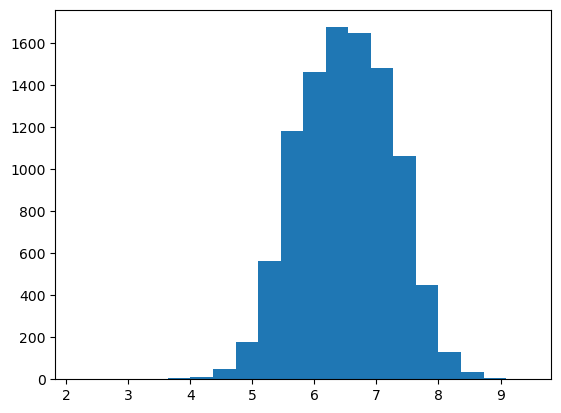

In [20]:
plt.hist(y_train_pred, bins = 20);

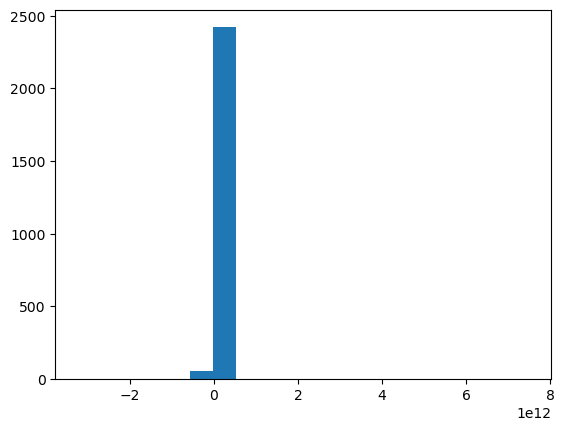

In [23]:
plt.hist(y_test_pred, bins = 20);

Text(0.5, 1.0, 'True vs Predicted (Test)')

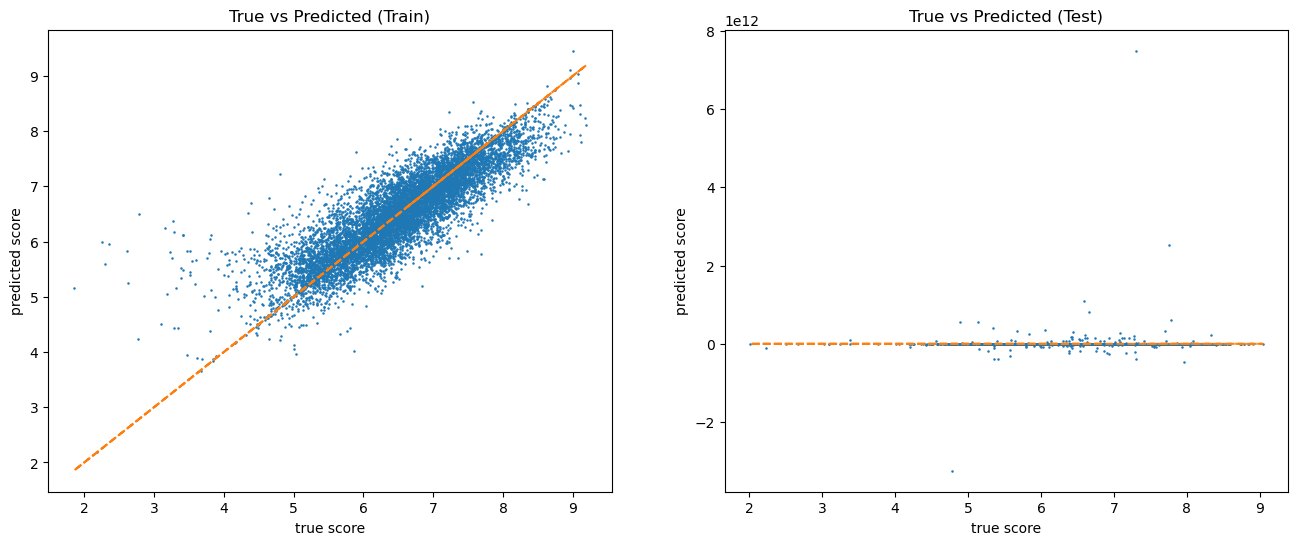

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(y_train, y_train_pred, 'o', ms = 0.8)
ax[0].plot(y_train, y_train, '--')
ax[0].set_xlabel('true score')
ax[0].set_ylabel('predicted score')
ax[0].set_title('True vs Predicted (Train)')

ax[1].plot(y_test, y_test_pred, 'o', ms = 0.8)
ax[1].plot(y_test, y_test, '--')
ax[1].set_xlabel('true score')
ax[1].set_ylabel('predicted score')
ax[1].set_title('True vs Predicted (Test)')

### 2.2 LassoCV

In [25]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [26]:
alpha_choice_range = np.logspace(-10, 10, 100)
LassoCV = LassoCV(alphas = alpha_choice_range).fit(x_train, y_train)
LassoCV_optimal_alpha = LassoCV.alpha_
LassoCV_optimal_alpha

/Users/zhanghanyuan/opt/anaconda3/envs/timeseries/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.704134097971064, tolerance: 0.6198964698137895
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zhanghanyuan/opt/anaconda3/envs/timeseries/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8632718345788817, tolerance: 0.6198964698137895
  model = cd_fast.enet_coordinate_descent_gram(
/Users/zhanghanyuan/opt/anaconda3/envs/timeseries/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0819889538890948, tolerance: 0.6198964698137895
  model = cd_fast.enet_coordi

0.00011497569953977356

train COD:  0.6918974024424218
test COD:  0.6469575115461103
train RMSE:  0.491
test RMSE:  0.532


Text(0.5, 1.0, 'True vs Predicted (Test)')

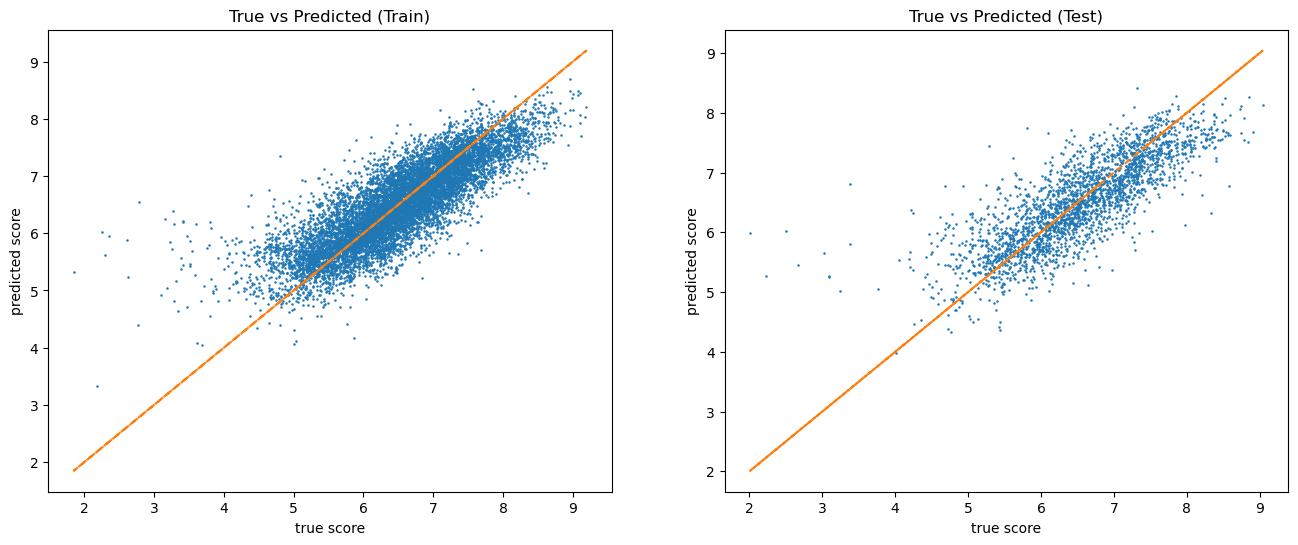

In [27]:
y_train_pred = LassoCV.predict(x_train)
y_test_pred = LassoCV.predict(x_test)

train_COD = r2_score(y_train,y_train_pred)
test_COD = r2_score(y_test,y_test_pred)

train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False).round(3)
test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False).round(3)

print('train COD: ', train_COD)
print('test COD: ', test_COD)

print('train RMSE: ', train_RMSE)
print('test RMSE: ', test_RMSE)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(y_train, y_train_pred, 'o', ms = 0.8)
ax[0].plot(y_train, y_train, '--')
ax[0].set_xlabel('true score')
ax[0].set_ylabel('predicted score')
ax[0].set_title('True vs Predicted (Train)')

ax[1].plot(y_test, y_test_pred, 'o', ms = 0.8)
ax[1].plot(y_test, y_test, '--')
ax[1].set_xlabel('true score')
ax[1].set_ylabel('predicted score')
ax[1].set_title('True vs Predicted (Test)')

In [28]:
coefficients = LassoCV.coef_
#importance of each features
importance = np.abs(coefficients)
importance

array([0.12236482, 0.23334733, 0.11347531, ..., 0.0731512 , 0.15841451,
       0.58838667])

In [29]:
#feature importance selector, return a binary array
#if the entry is 1, the correspdonding feature is maintained
importance_selector = []
for i, item in enumerate(importance):
    if item > 1e-10:
        importance_selector.append(True)
    else:
        importance_selector.append(False)
importance_selector = np.array(importance_selector)
importance_selector = importance_selector.astype(int)
importance_selector

array([1, 1, 1, ..., 1, 1, 1])

In [30]:
num_of_selected_feature = sum(importance_selector)
num_of_selected_feature

623

In [31]:
#get data with all 623 selected features
x_train_selected = x_train[:, importance_selector.astype(bool)]
x_test_selected = x_test[:, importance_selector.astype(bool)]
y_train_selected = y_train
y_test_selected = y_test

#transform them to float 32
x_train_selected, x_test_selected, y_train_selected, y_test_selected = \
    x_train_selected.astype(np.float32), x_test_selected.astype(np.float32), y_train_selected.astype(np.float32), y_test_selected.astype(np.float32)
x_train_selected.shape, x_test_selected.shape, y_train_selected.shape, y_test_selected.shape

((9936, 623), (2485, 623), (9936,), (2485,))

In [32]:
#get the index of ranked importance (descending)
ranked_index = np.argsort(importance)[:-1][::-1]
coefs_of_important_features = [coefficients[ranked_index[i]] for i in range(len(ranked_index))]

#get the name of important features
important_features_name = [features_names[ranked_index[i]] for i in range(len(ranked_index))]
important_features_name[:33], coefs_of_important_features[:33]

(['(producers)Natural High',
  '(studios)ILCA, DRAWIZ, Toho Interactive Animation',
  '(producers)Primastea',
  '(studios)Studio elle, l-a-unch・BOX',
  '(producers)Idea Factory',
  '(studios)YHKT Entertainment',
  '(producers)Kuri Jikken Manga Kobo',
  '(producers)G-mode',
  '(studios)RAMS',
  '(producers)Filmlink International',
  '(studios)Sparkly Key Animation Studio',
  '(studios)Kyotoma',
  '(studios)LICO, Red Dog Culture House',
  '(studios)Studio A-CAT',
  '(producers)Tohan Corporation',
  '(studios)AIC Frontier',
  '(studios)Natural High',
  '(studios)Encourage Films',
  '(studios)drop',
  '(producers)Sankyo Planning',
  '(producers)Assez Finaud Fabric',
  '(studios)Radix, Marine Entertainment',
  '(studios)L²Studio',
  '(studios)Saetta',
  '(studios)Kyotoma, Office Nobu',
  '(studios)EMT Squared',
  '(producers)Obtain Future',
  '(producers)Rex Entertainment',
  '(studios)Millepensee, GEMBA',
  '(studios)Motion Magic',
  '(studios)Enishiya',
  '(studios)Production I.G, DLE',
 

### 2.3 Control Numbers of Features (Ridge Regression)

In [33]:
from sklearn.linear_model import Ridge

In [34]:
# num_of_fearure_choice = np.concatenate((np.arange(10, num_of_selected_feature+1, 10), np.array([num_of_selected_feature])), axis = 0)
num_of_feature_choice = np.arange(1, num_of_selected_feature+1, 1)

In [35]:
train_RMSE_list = []
test_RMSE_list = []

for index, num in enumerate(num_of_feature_choice):
    #for each loop, we use the top num's selected features as input x
    current_x_train = x_train[:, ranked_index[:num]]
    current_x_test = x_test[:, ranked_index[:num]]

    ridge = Ridge(alpha = 1).fit(current_x_train, y_train)

    y_train_pred = ridge.predict(current_x_train)
    y_test_pred = ridge.predict(current_x_test)

    train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False).round(3)
    test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False).round(3)

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

train_RMSE_list = np.array(train_RMSE_list)
test_RMSE_list = np.array(test_RMSE_list)

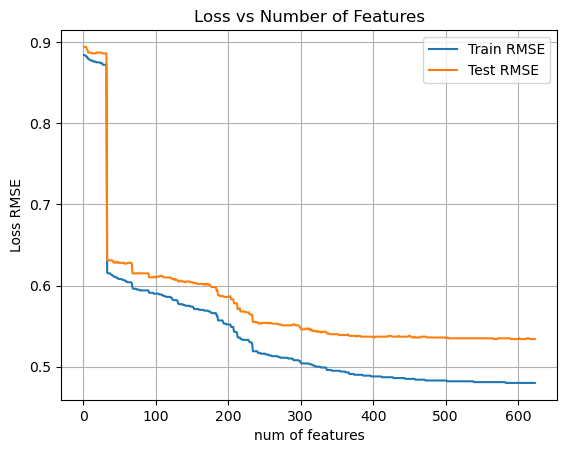

In [36]:
plt.figure()
plt.plot(num_of_feature_choice, train_RMSE_list, label = 'Train RMSE')
plt.plot(num_of_feature_choice, test_RMSE_list, label = 'Test RMSE')
plt.grid()
plt.xlabel('num of features')
plt.ylabel('Loss RMSE')
plt.title('Loss vs Number of Features')
plt.legend()

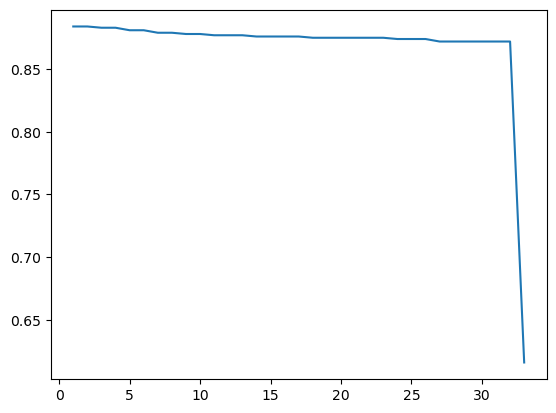

In [39]:
plt.plot(num_of_feature_choice[:33], train_RMSE_list[:33], label = 'Train RMSE')
#there is a significant drop in 31th feature

In [42]:
important_features_name[0:33], coefs_of_important_features[0:33]

(['(producers)Natural High',
  '(studios)ILCA, DRAWIZ, Toho Interactive Animation',
  '(producers)Primastea',
  '(studios)Studio elle, l-a-unch・BOX',
  '(producers)Idea Factory',
  '(studios)YHKT Entertainment',
  '(producers)Kuri Jikken Manga Kobo',
  '(producers)G-mode',
  '(studios)RAMS',
  '(producers)Filmlink International',
  '(studios)Sparkly Key Animation Studio',
  '(studios)Kyotoma',
  '(studios)LICO, Red Dog Culture House',
  '(studios)Studio A-CAT',
  '(producers)Tohan Corporation',
  '(studios)AIC Frontier',
  '(studios)Natural High',
  '(studios)Encourage Films',
  '(studios)drop',
  '(producers)Sankyo Planning',
  '(producers)Assez Finaud Fabric',
  '(studios)Radix, Marine Entertainment',
  '(studios)L²Studio',
  '(studios)Saetta',
  '(studios)Kyotoma, Office Nobu',
  '(studios)EMT Squared',
  '(producers)Obtain Future',
  '(producers)Rex Entertainment',
  '(studios)Millepensee, GEMBA',
  '(studios)Motion Magic',
  '(studios)Enishiya',
  '(studios)Production I.G, DLE',
 

In [44]:
#discover what happend in 33th feature
important_features_name[32], coefs_of_important_features[32]
#It is the popuality, which is very different with previous features

('Popularity', -0.5883866691904859)

train COD:  0.705876714955393
test COD:  0.6437177892474197
train RMSE:  0.48
test RMSE:  0.534


Text(0.5, 1.0, 'True vs Predicted (Test)')

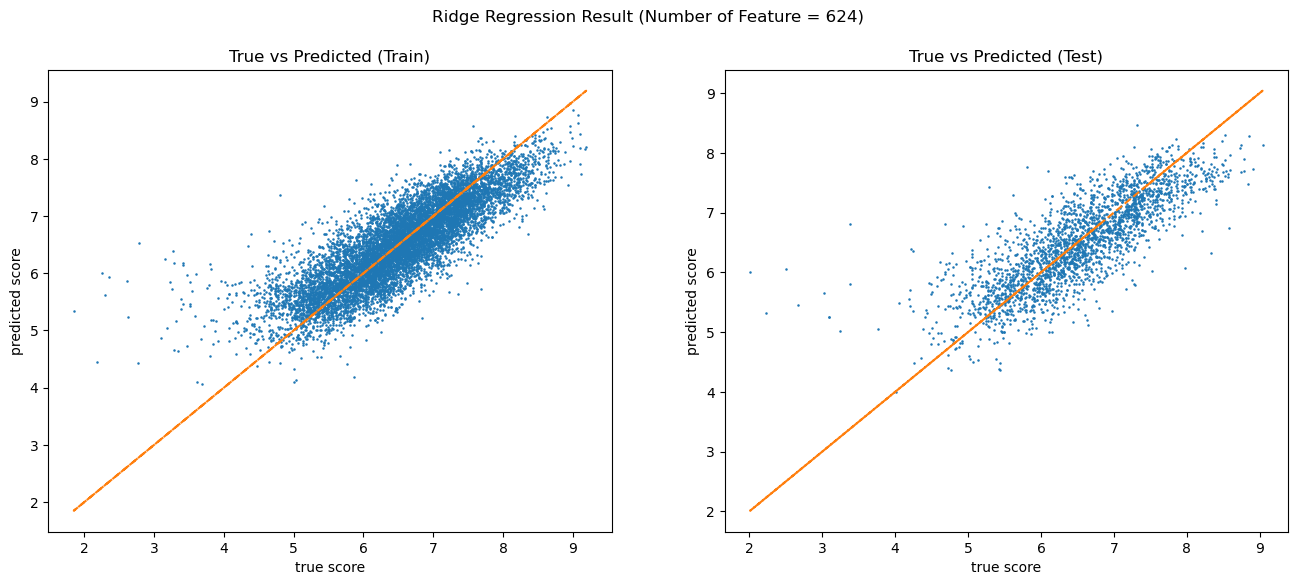

In [47]:
#Also, we want to get the best RMSE result when num of feature = 623
y_train_pred = ridge.predict(current_x_train)
y_test_pred = ridge.predict(current_x_test)

train_COD = r2_score(y_train,y_train_pred)
test_COD = r2_score(y_test,y_test_pred)

train_RMSE = mean_squared_error(y_train, y_train_pred, squared=False).round(3)
test_RMSE = mean_squared_error(y_test, y_test_pred, squared=False).round(3)

print('train COD: ', train_COD)
print('test COD: ', test_COD)

print('train RMSE: ', train_RMSE)
print('test RMSE: ', test_RMSE)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Ridge Regression Result (Number of Feature = 623)')
ax[0].plot(y_train, y_train_pred, 'o', ms = 0.8)
ax[0].plot(y_train, y_train, '--')
ax[0].set_xlabel('true score')
ax[0].set_ylabel('predicted score')
ax[0].set_title('True vs Predicted (Train)')

ax[1].plot(y_test, y_test_pred, 'o', ms = 0.8)
ax[1].plot(y_test, y_test, '--')
ax[1].set_xlabel('true score')
ax[1].set_ylabel('predicted score')
ax[1].set_title('True vs Predicted (Test)')

### 2.4 NN

In [49]:
## build NN
import os
import torch
from torch import nn
from torch.utils.data import DataLoader

Step 1: get selected features given by Lasso

In [50]:
#data with selected features in tensor format
x_train_selected_tensor = torch.from_numpy(x_train_selected)
x_test_selected_tensor = torch.from_numpy(x_test_selected)
y_train_selected_tensor = torch.from_numpy(y_train_selected)
y_test_selected_tensor = torch.from_numpy(y_test_selected)

Step 2: start to build NN model

In [51]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [52]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(x_train_selected.shape[1], 1024),
            nn.ReLU(),
            nn.Linear(1024, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.dropout(x)
        logits = self.linear_relu_stack(x)
        return logits

In [53]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=623, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=1, bias=True)
  )
)


In [54]:
logits = model(x_train_selected_tensor)

In [55]:
class RMSELoss(nn.Module):
    def __init__(self):
        super().__init__()
        self.mse = nn.MSELoss()
        
    def forward(self,yhat,y):
        return torch.sqrt(self.mse(yhat,y))
        
loss_criterion = RMSELoss()

In [57]:
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [58]:
train_loss_log = []
test_loss_log = []

for t in range(2000):
    y_pred = model(x_train_selected_tensor)
    train_loss = loss_criterion(y_pred, y_train_selected_tensor)
    train_loss_log.append(train_loss.item())
    if t % 400 == 0:
        print(t, train_loss.item())
    model.zero_grad()
    train_loss.backward()

    with torch.no_grad():
        y_test_pred = model(x_test_selected_tensor)
        test_loss = loss_criterion(y_test_pred, y_test_selected_tensor)
        test_loss_log.append(test_loss.item())
        for param in model.parameters():
            param -= learning_rate * param.grad

/Users/zhanghanyuan/opt/anaconda3/envs/timeseries/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([9936])) that is different to the input size (torch.Size([9936, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 6.497608184814453


/Users/zhanghanyuan/opt/anaconda3/envs/timeseries/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([2485])) that is different to the input size (torch.Size([2485, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


400 0.8918362855911255
800 0.8884909749031067
1200 0.8872327208518982
1600 0.8865588903427124


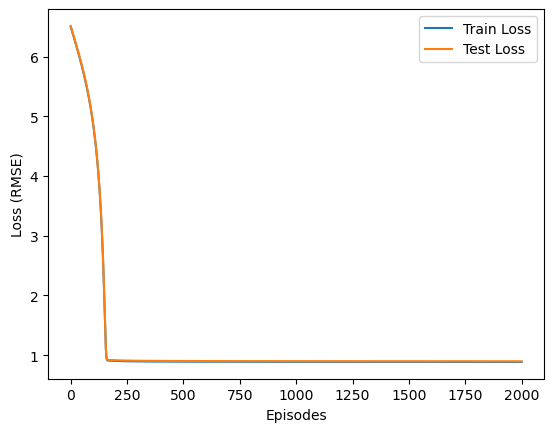

In [63]:
plt.figure()
plt.plot(train_loss_log, label = 'Train Loss')
plt.plot(test_loss_log, label = 'Test Loss')
plt.xlabel('Episodes')
plt.ylabel('Loss (RMSE)')
plt.legend()

In [64]:
from torchmetrics import R2Score
pytorch_r2score = R2Score()

In [65]:
y_train_pred = model(x_train_selected_tensor)
y_test_pred = model(x_test_selected_tensor)

# y_train_R2 = pytorch_r2score(y_train_pred, y_train_selected_tensor)
# y_test_R2 = pytorch_r2score(y_test_pred, y_test_selected_tensor)

train_RMSE = loss_criterion(y_train_pred, y_train_selected_tensor)
test_RMSE = loss_criterion(y_test_pred, y_test_selected_tensor)

# print('train COD: ', train_COD)
# print('test COD: ', test_COD)

print('train RMSE: ', train_RMSE)
print('test RMSE: ', test_RMSE)

train RMSE:  tensor(0.8861, grad_fn=<SqrtBackward0>)
test RMSE:  tensor(0.8967, grad_fn=<SqrtBackward0>)


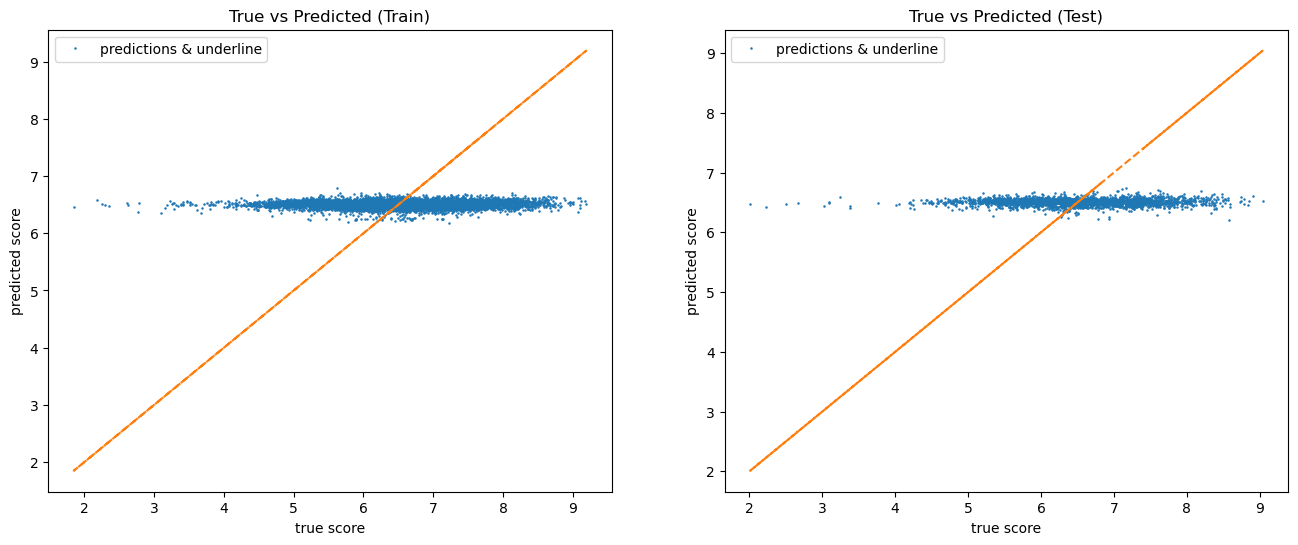

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(y_train_selected_tensor.detach().numpy(), y_train_pred.detach().numpy(), 'o', ms = 0.8, label = 'predictions & underline')
ax[0].plot(y_train_selected_tensor.detach().numpy(), y_train_selected_tensor.detach().numpy(), '--')
ax[0].set_xlabel('true score')
ax[0].set_ylabel('predicted score')
ax[0].set_title('True vs Predicted (Train)')
ax[0].legend()

ax[1].plot(y_test_selected_tensor.detach().numpy(), y_test_pred.detach().numpy(), 'o', ms = 0.8, label = 'predictions & underline')
ax[1].plot(y_test_selected_tensor.detach().numpy(), y_test_selected_tensor.detach().numpy(), '--')
ax[1].set_xlabel('true score')
ax[1].set_ylabel('predicted score')
ax[1].set_title('True vs Predicted (Test)')
ax[1].legend()